# Packages

In [1]:
import os
import itertools
import numpy as np
import math as math
import pandas as pd 
import random as random
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from utils.Auxiliary import *

# Input


In [2]:
DataType = "MONK1"
BaseDirectory = "/Users/simondn/Documents/RashomonActiveLearning/Results/"
RandomForesResults = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", 0.0)
AnalyzedData010 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.010)
AnalyzedData015 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.015)
AnalyzedData020 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.020)
AnalyzedData025 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.025)

# Shape

In [3]:
ShapeTable = {"DUREAL":[AnalyzedData010["Error_DUREAL"].shape[0],
                        AnalyzedData015["Error_DUREAL"].shape[0],
                        AnalyzedData020["Error_DUREAL"].shape[0],
                        AnalyzedData025["Error_DUREAL"].shape[0]],
              "UNREAL": [AnalyzedData010["Error_UNREAL"].shape[0],
                         AnalyzedData015["Error_UNREAL"].shape[0], 
                         AnalyzedData020["Error_UNREAL"].shape[0], 
                         AnalyzedData025["Error_UNREAL"].shape[0]]}
ShapeTable = pd.DataFrame(ShapeTable)
ShapeTable.index = range(10,30,5)
ShapeTable

,DUREAL,UNREAL
10,100,100
15,100,100
20,100,100
25,100,100


# Run Time

In [4]:
TimeTable = {"DUREAL Mean":[str(round(np.mean(AnalyzedData010["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData015["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData020["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData025["Time_DUREAL"])/60,2))],
              "UNREAL Mean": [str(round(np.mean(AnalyzedData010["Time_UNREAL"])/60,2)),
                         str(round(np.mean(AnalyzedData015["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData020["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData025["Time_UNREAL"])/60,2))],
                "DUREAL max":[str(round(np.max(AnalyzedData010["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData015["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData020["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData025["Time_DUREAL"])/60,2))],
              "UNREAL max": [str(round(np.max(AnalyzedData010["Time_UNREAL"])/60,2)),
                         str(round(np.max(AnalyzedData015["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData020["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData025["Time_UNREAL"])/60,2))]
                         }
TimeTable = pd.DataFrame(TimeTable)
TimeTable.index = range(10,30,5)
TimeTable

,DUREAL Mean,UNREAL Mean,DUREAL max,UNREAL max
10,1.25,1.24,2.13,2.7
15,2.11,2.11,4.27,4.12
20,5.81,5.92,27.95,28.15
25,8.0,8.8,41.3,43.57


# Error Vec

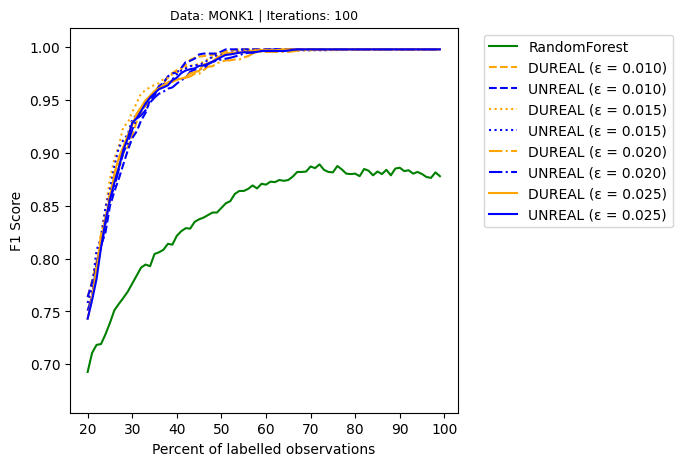

In [5]:
### Set Up ###
PlotSubtitle = f"Data: {DataType} | Iterations: {AnalyzedData015['Error_DUREAL'].shape[0]}"
colors = {
    "RandomForest": "green",
    "DUREAL010": "orange",
    "UNREAL010": "blue",
    "DUREAL015": "orange",
    "UNREAL015": "blue",
    "DUREAL020": "orange",
    "UNREAL020": "blue",
    "DUREAL025": "orange",
    "UNREAL025": "blue"
}

linestyles = {
    "RandomForest": "solid",
    "DUREAL010": "dashed",
    "UNREAL010": "dashed",
    "DUREAL015": "dotted",
    "UNREAL015": "dotted",
    "DUREAL020": "dashdot",
    "UNREAL020": "dashdot",
    "DUREAL025": "solid",
    "UNREAL025": "solid"
}

LegendMapping = {
    "DUREAL010": "DUREAL (ε = 0.010)",
    "UNREAL010": "UNREAL (ε = 0.010)",
    "DUREAL015": "DUREAL (ε = 0.015)",
    "UNREAL015": "UNREAL (ε = 0.015)",
    "DUREAL020": "DUREAL (ε = 0.020)",
    "UNREAL020": "UNREAL (ε = 0.020)",
    "DUREAL025": "DUREAL (ε = 0.025)",
    "UNREAL025": "UNREAL (ε = 0.025)"
}

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 RandomForest = RandomForesResults["Error_RF"],
                 DUREAL010 = AnalyzedData010["Error_DUREAL"],
                 UNREAL010 = AnalyzedData010["Error_UNREAL"],
                 DUREAL015 = AnalyzedData015["Error_DUREAL"],
                 UNREAL015 = AnalyzedData015["Error_UNREAL"],
                 DUREAL020 = AnalyzedData020["Error_DUREAL"],
                 UNREAL020 = AnalyzedData020["Error_UNREAL"],
                 DUREAL025 = AnalyzedData025["Error_DUREAL"],
                 UNREAL025 = AnalyzedData025["Error_UNREAL"],
                 Colors = colors,
                 LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "F1 Score",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 VarInput = False,
                 CriticalValue = 1.96)

# Input

In [8]:
AnalyzedDataSmall = AnalyzedData010
AnalyzedDataLarge = AnalyzedData025

# Selection History

In [9]:
SelectionHistoryRank_RF = SelectionHistoryRankFunction(RandomForesResults["SelectionHistory_RF"], DataType = DataType)
SelectionHistoryRank_UNREALLarge = SelectionHistoryRankFunction(AnalyzedDataLarge["SelectionHistory_UNREAL"], DataType = DataType)
SelectionHistoryRank_DUREALLarge = SelectionHistoryRankFunction(AnalyzedDataLarge["SelectionHistory_DUREAL"], DataType = DataType)
SelectionHistoryRank_RF.sort_values(by = "AverageRank").head()
SelectionHistoryRank_UNREALLarge.sort_values(by = "AverageRank").head()
SelectionHistoryRank_DUREALLarge.sort_values(by = "AverageRank").head()

,AverageRank,Y,a1_1,a1_2,a2_1,a2_2,a3_1,a4_1,a4_2,a5_1,a5_2,a5_3,a6_1
95,10.603175,False,False,False,True,False,False,False,True,False,False,True,False
85,11.156250,False,False,True,False,False,False,False,True,False,True,False,True
100,12.206349,False,False,False,False,True,True,False,True,False,False,False,False
105,12.688525,False,False,False,False,True,False,False,False,False,True,False,True
74,12.931507,True,False,True,False,True,False,False,True,False,True,False,True


# Tree Counts

In [10]:
UNREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatioSmall = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioSmall, 
                              DUREAL_Average_TreeCountsRatioSmall,
                              np.round(UNREAL_Average_TreeCountsRatioSmall - DUREAL_Average_TreeCountsRatioSmall,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

UNREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatioLarge = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioLarge, 
                              DUREAL_Average_TreeCountsRatioLarge,
                              np.round(UNREAL_Average_TreeCountsRatioLarge - DUREAL_Average_TreeCountsRatioLarge,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

# Number of All Trees

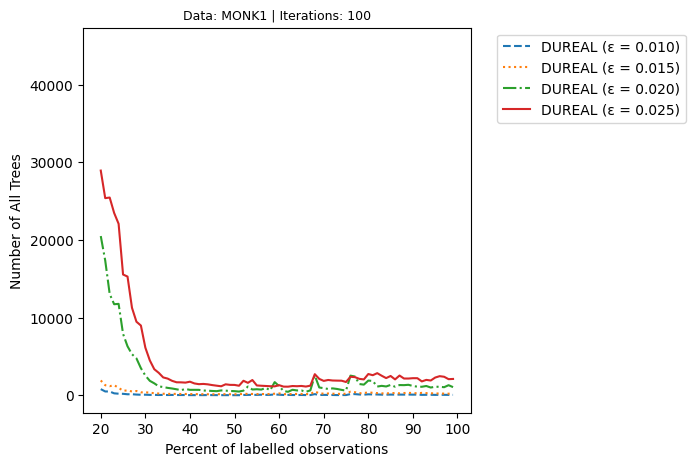

In [11]:
### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 DUREAL010 = AnalyzedData010["TreeCounts_ALL_UNREAL"],
                #  UNREAL010 = AnalyzedData010["TreeCounts_UNIQUE_UNREAL"],
                 DUREAL015 = AnalyzedData015["TreeCounts_ALL_UNREAL"],
                #  UNREAL015 = AnalyzedData015["TreeCounts_UNIQUE_UNREAL"],
                 DUREAL020 = AnalyzedData020["TreeCounts_ALL_UNREAL"],
                #  UNREAL020 = AnalyzedData020["TreeCounts_UNIQUE_UNREAL"],
                 DUREAL025 = AnalyzedData025["TreeCounts_ALL_UNREAL"],
                #  UNREAL025 = AnalyzedData025["TreeCounts_UNIQUE_UNREAL"],
                # Colors = colors,
                 LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "Number of All Trees",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 VarInput = False,
                 CriticalValue = 1.96)

## Number of Unique Trees

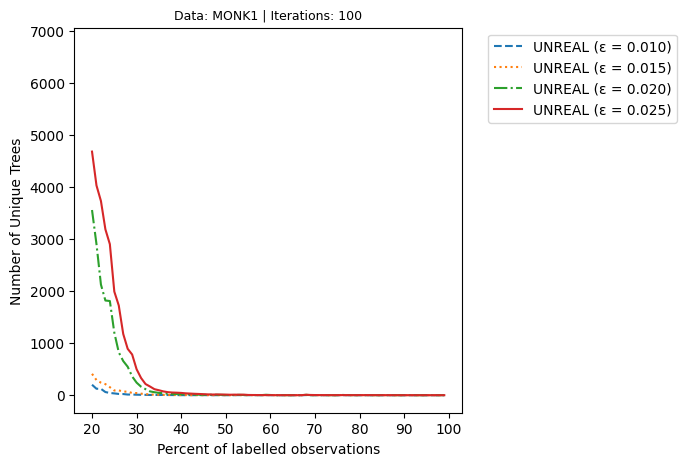

In [12]:
### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                #  DUREAL010 = AnalyzedData010["TreeCounts_ALL_UNREAL"],
                 UNREAL010 = AnalyzedData010["TreeCounts_UNIQUE_UNREAL"],
                #  DUREAL015 = AnalyzedData015["TreeCounts_ALL_UNREAL"],
                 UNREAL015 = AnalyzedData015["TreeCounts_UNIQUE_UNREAL"],
                #  DUREAL020 = AnalyzedData020["TreeCounts_ALL_UNREAL"],
                 UNREAL020 = AnalyzedData020["TreeCounts_UNIQUE_UNREAL"],
                #  DUREAL025 = AnalyzedData025["TreeCounts_ALL_UNREAL"],
                 UNREAL025 = AnalyzedData025["TreeCounts_UNIQUE_UNREAL"],
                # Colors = colors,
                 LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "Number of Unique Trees",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 VarInput = False,
                 CriticalValue = 1.96)